Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 20 May 2020), this leads to a total of 300K+ Deaths across the globe, including 90K+ deaths alone in USA.The dataset  is provided to identify the deaths and recovered cases.

In [55]:
#importing all the necssary libreray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [56]:
#loading the dataset
df=pd.read_csv("covid_US.csv")
#lets see insights of the data sets
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [57]:
df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


In [58]:
#cheking the columns
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [59]:
#checking the data types
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [60]:
#Checking the shape
df.shape

(58, 18)

In [61]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [62]:
#Field description
#Country_Region - The name of the Country (US).
#Last_Update - The most recent date the file was pushed.
#Lat - Latitude.
#Long_ - Longitude.
#Confirmed - Aggregated confirmed case count for the state.
#Deaths - Aggregated Death case count for the state.
#Recovered - Aggregated Recovered case count for the state.
#Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
#FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
#Incident_Rate - confirmed cases per 100,000 persons.
#People_Tested - Total number of people who have been tested.
#People_Hospitalized - Total number of people hospitalized.
#Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
#UID - Unique Identifier for each row entry.
#ISO3 - Officialy assigned country code identifiers.
#Testing_Rate - Total number of people tested per 100,000 persons.
#Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.


# Summary statistics

In [63]:
df.describe(include="all")

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58,58,58,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,58,56.000000,33.000000
unique,58,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,Arizona,US,2020-05-21 02:32:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN
freq,1,58,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,NaN,NaN
mean,NaN,NaN,NaN,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,NaN,3894.186870,14.342541
std,NaN,NaN,NaN,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,NaN,1933.169297,5.047403
min,NaN,NaN,NaN,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,NaN,97.702058,6.778043
25%,NaN,NaN,NaN,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,NaN,2712.800274,10.000000
50%,NaN,NaN,NaN,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,NaN,3469.782532,13.598326
75%,NaN,NaN,NaN,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,NaN,4763.649736,17.658649


In [64]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [65]:
#cheking unique dates
df["Last_Update"].unique()

array(['2020-05-21 02:32:54'], dtype=object)

In [66]:
#obsservation
#Columns like lat, long,recovered ,incident rate, people tested,people hospitalized,mortality rate,testing rate,Hospitalization_Rate have null values we need to fill those values.
#There are total 58 province states.country region is US only so we can drop this column
#last date is same for all the rows so we can drop that also
#Iso 3 has 6 catagories.
#By looking at the values of mean, median , and 75% and 100% of the each column,we can say that skewness and outliers are present in some of the columns

In [67]:
# Encoding the provice state column
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["Province_State"] = lb.fit_transform(df["Province_State"])

<AxesSubplot:>

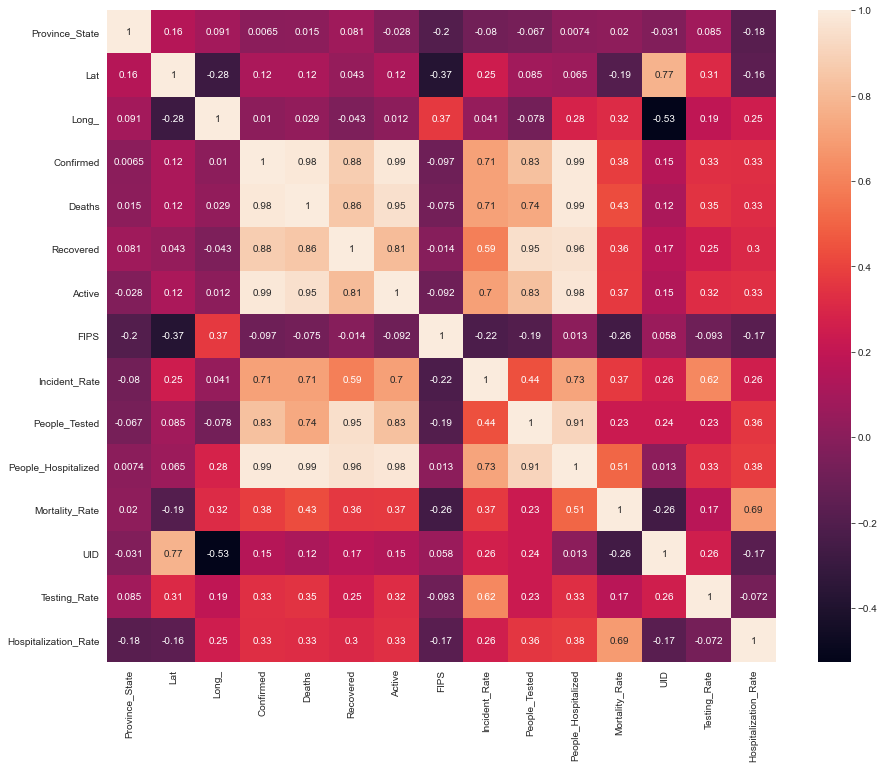

In [68]:
#checking the correlation
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [69]:
#Here columns long and FIPS have very low co-relation with both the target variables so we can drop those
#As we said earlier column country and Last_Update has only 1 value so we can drop that also
df.drop(["FIPS","Long_","Last_Update","Country_Region","ISO3"],axis=1,inplace=True)

In [70]:
#lets fill the null values
#we will fill the null values with median.beacuse most of the columns have large difference between 75% and 100% which will result in a outlier and will infulence the mean of the feature
#columns with high null values like recovered rate  will be filled later
list1=["Lat","Incident_Rate","People_Tested","Mortality_Rate","Testing_Rate","Hospitalization_Rate","People_Hospitalized"  ]
from sklearn.impute import SimpleImputer
for i in list1:
    si=SimpleImputer(strategy="median")
    df[i]=si.fit_transform(df[i].values.reshape(-1,1))
#lets fill the recovery and people hospitalized null values
df['Recovered'].fillna(df['Confirmed']-(df['Active']+df['Deaths']),inplace=True)

In [71]:
df.isnull().sum()

Province_State          0
Lat                     0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

# Univariant analysis

Toatal confirmed cases around US is 1551853
Toatal  active cases around US is 1164102.0 percentage of active cases out of confirmed cases is 75.01367719751806
Toatal  Recovered cases around US is 294312.0 percentage of Recovered cases out of confirmed cases is 18.965198378970175
Toatal  Deaths cases around US is 93439 percentage of Deaths out of confirmed cases is 6.021124423511763


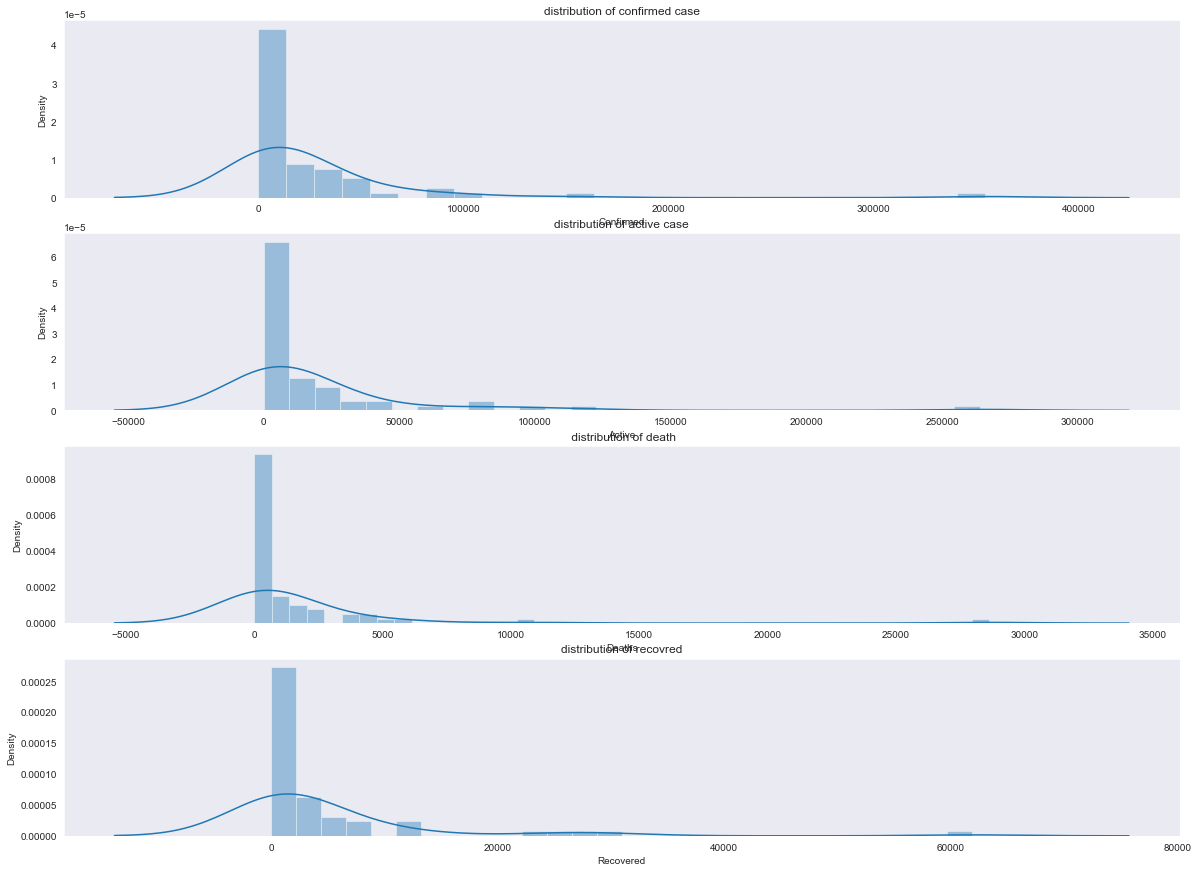

In [72]:
#Analysis of distribution of confirmed case, death ,recovered case,active case
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(20,15))
sns.distplot(df["Confirmed"],ax=ax1)
ax1.set_title("distribution of confirmed case")
sns.distplot(df["Active"],ax=ax2)
ax2.set_title("distribution of active case")
sns.distplot(df["Deaths"],ax=ax3)
ax3.set_title(" distribution of death")
sns.distplot(df["Recovered"],ax=ax4)
ax4.set_title("distribution of recovred")
percentage_of_active=(df["Active"].sum()/df["Confirmed"].sum())*100
percentage_of_recovered=(df["Recovered"].sum()/df["Confirmed"].sum())*100
percentage_of_deaths=(df["Deaths"].sum()/df["Confirmed"].sum())*100
print("Toatal confirmed cases around US is",df["Confirmed"].sum())
print("Toatal  active cases around US is",df["Active"].sum(),"percentage of active cases out of confirmed cases is",percentage_of_active)
print("Toatal  Recovered cases around US is",df["Recovered"].sum(),"percentage of Recovered cases out of confirmed cases is",percentage_of_recovered)
print("Toatal  Deaths cases around US is",df["Deaths"].sum(),"percentage of Deaths out of confirmed cases is",percentage_of_deaths)

In [73]:
#From the graph we can see that density of confirmed ,active,recovered and deaths are high at the begining of graph 
#only 22% cases are recovered 75% is still active
#so only few states are highly infected(more than 1lakh),so we can say that covid spread is in its starting stage.


Total of people tested 12925100.0
Total of people Hospitalized 198941.0
percentage of people hospitalized after testing is  1.5391834492576462


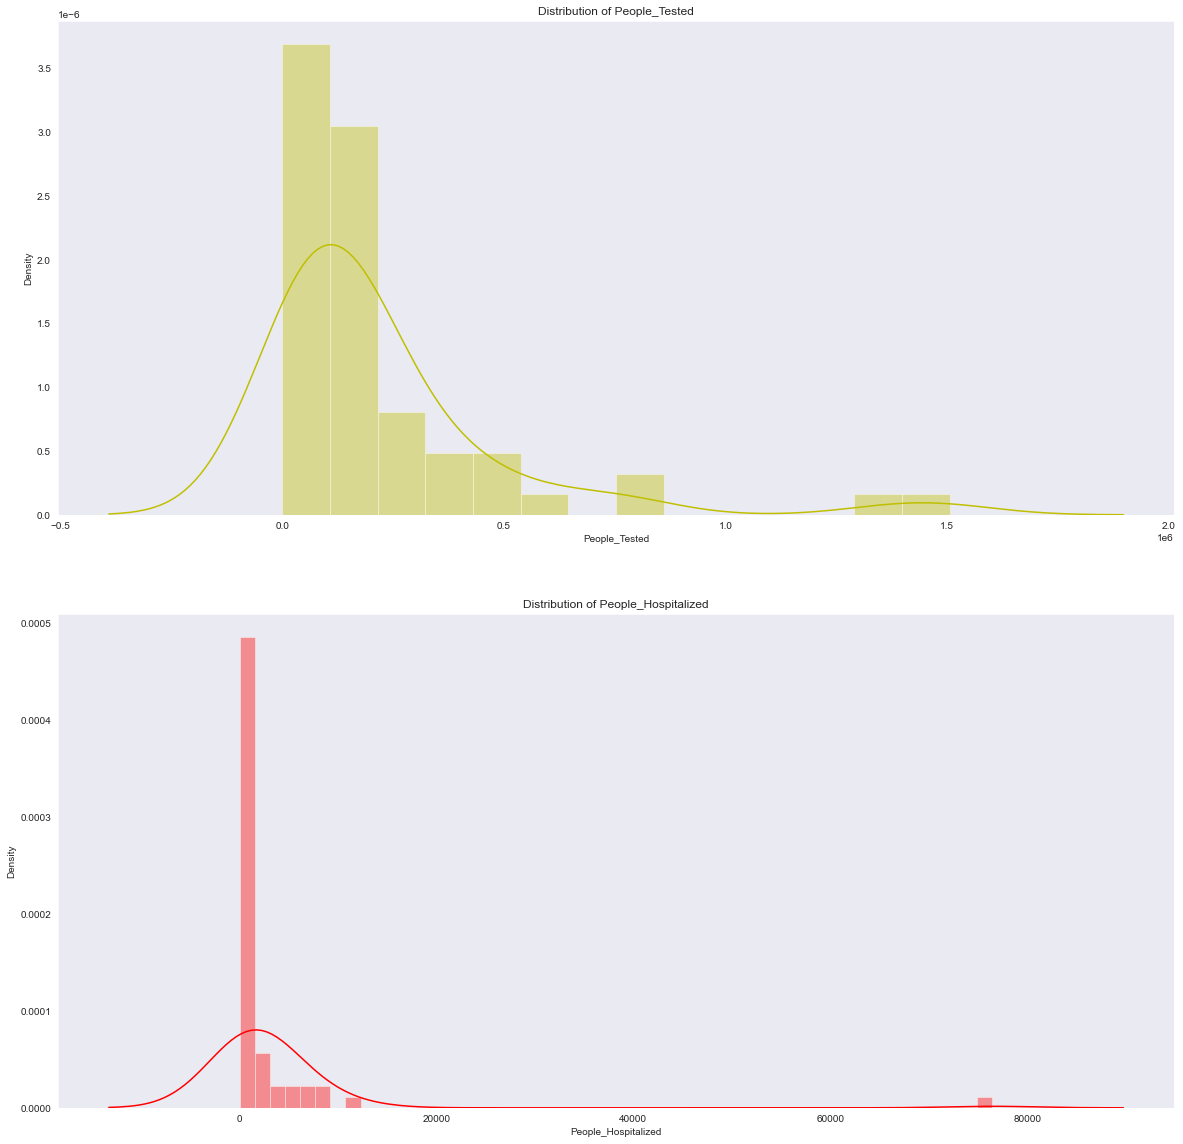

In [74]:
#Analysis of People_Tested and People_Hospitalized
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,20))
sns.distplot(df["People_Tested"],ax=ax1,color="y")
ax1.set_title("Distribution of People_Tested")
sns.distplot(df["People_Hospitalized"],ax=ax2,color="r")
ax2.set_title("Distribution of People_Hospitalized")
print("Total of people tested",df["People_Tested"].sum())
print("Total of people Hospitalized",df["People_Hospitalized"].sum())
print("percentage of people hospitalized after testing is ", (df["People_Hospitalized"].sum()/df["People_Tested"].sum())*100)

In [75]:
#Out of total people tested only 1.53 percent of people hospitalized

array([[<AxesSubplot:title={'center':'Province_State'}>,
        <AxesSubplot:title={'center':'Lat'}>,
        <AxesSubplot:title={'center':'Confirmed'}>,
        <AxesSubplot:title={'center':'Deaths'}>],
       [<AxesSubplot:title={'center':'Recovered'}>,
        <AxesSubplot:title={'center':'Active'}>,
        <AxesSubplot:title={'center':'Incident_Rate'}>,
        <AxesSubplot:title={'center':'People_Tested'}>],
       [<AxesSubplot:title={'center':'People_Hospitalized'}>,
        <AxesSubplot:title={'center':'Mortality_Rate'}>,
        <AxesSubplot:title={'center':'UID'}>,
        <AxesSubplot:title={'center':'Testing_Rate'}>],
       [<AxesSubplot:title={'center':'Hospitalization_Rate'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

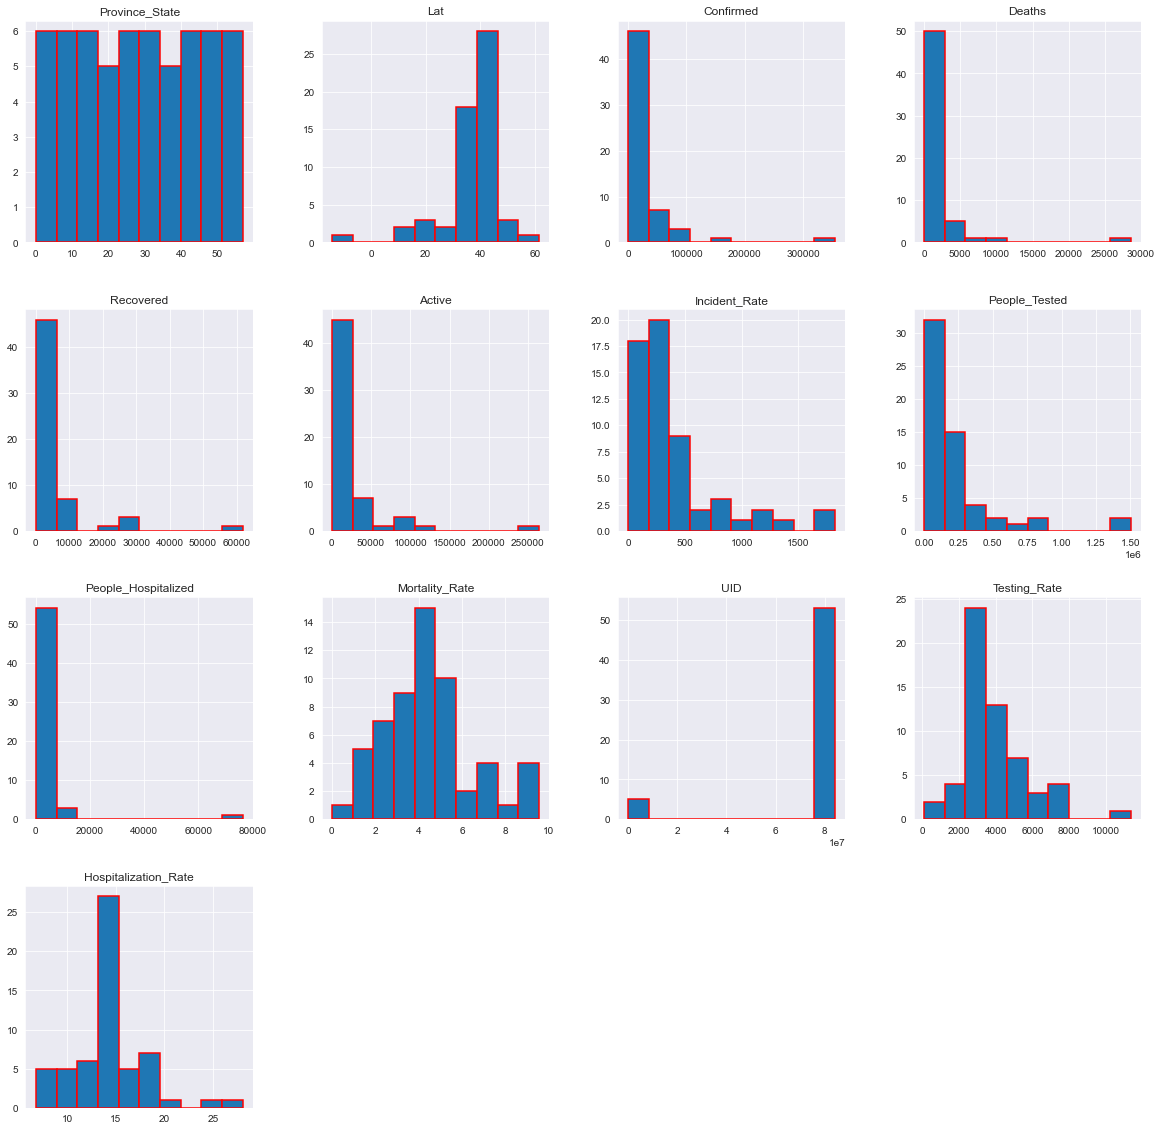

In [76]:
#checking the all the coulumns
df.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))

In [77]:
#Mortality rate: about 15 states have mortality rate of 4000,1stae has 0 mortality rate,around 5 states have mortality rate of more than 8000
#Only 2 unique IDs are present
#About 25 states have testing rates of 2000-4000.only 1 state has testing rate of more than 10000

# Bi-variant analysis

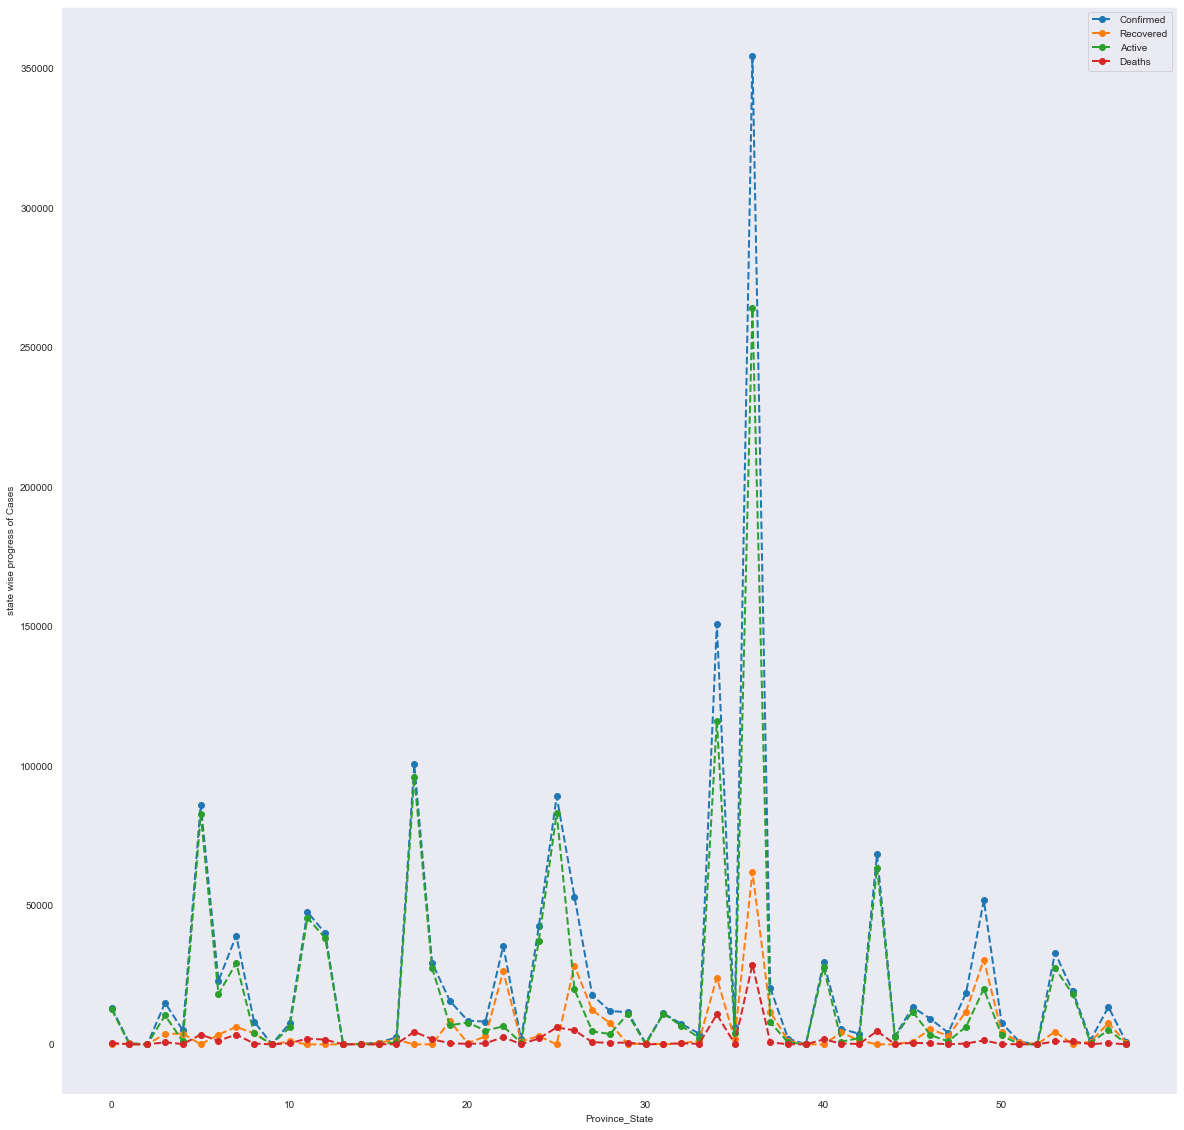

maximum covid confirmed,active,recovered,death cases is present at provice 36    36
Name: Province_State, dtype: int32
minmum covid confirmed,active,recovered,death cases is present at provice 2    2
Name: Province_State, dtype: int32


In [78]:
#Analysis of confirmed ,active,recovered and deaths at various provinces
plt.figure(figsize=(20,20))
plt.plot(df["Province_State"],df["Confirmed"],linestyle='dashed',marker='o',linewidth=2,label='Confirmed')
plt.plot(df["Province_State"],df["Recovered"],linestyle='dashed',marker='o',linewidth=2,label='Recovered')
plt.plot(df["Province_State"],df["Active"],linestyle='dashed',marker='o',linewidth=2,label='Active')
plt.plot(df["Province_State"],df["Deaths"],linestyle='dashed',marker='o',linewidth=2,label='Deaths')
plt.xlabel("Province_State")
plt.ylabel("state wise progress of Cases")
plt.legend()
plt.show()
print("maximum covid confirmed,active,recovered,death cases is present at provice",df['Province_State'][df.Confirmed == df['Confirmed'].max()])
print("minmum covid confirmed,active,recovered,death cases is present at provice",df['Province_State'][df.Confirmed == df['Confirmed'].min()])

In [79]:
df.columns

Index(['Province_State', 'Lat', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'UID', 'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [80]:
#Observation
#so we can say that covid spread started first at province 36 which has maximum cases and deaths
#covid spread started just now in province 2 which has least cases for now

Text(0.5, 1.0, 'State Wise Testing_Rate')

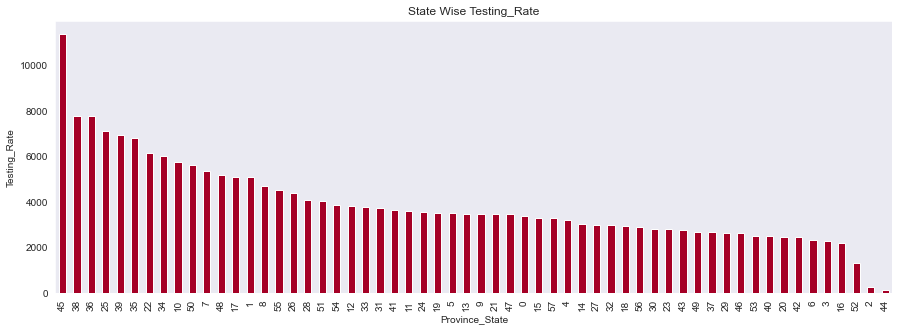

In [81]:
#Analysis of testing rate at various provinces
sns.set_style("dark")
plt.figure(figsize=(15,5))
df.groupby('Province_State')['Testing_Rate'].sum().sort_values(ascending=False).plot(kind='bar',cmap='RdYlBu')
plt.xlabel("Province_State")
plt.ylabel("Testing_Rate")
plt.title("State Wise Testing_Rate")

In [82]:
#Obseravtion
#Testing rate is maximum at provice 45 and minimum at 44
#Average testing rate in country is 3894

Text(0.5, 1.0, 'State Wise Hospitalization_Rate')

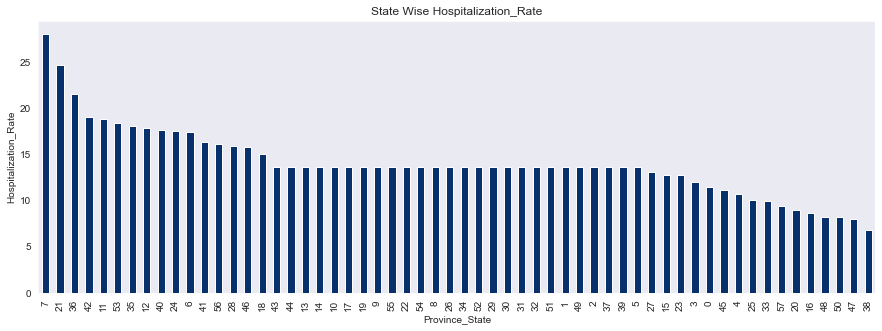

In [83]:
#Analysis of Hospitalization_Rate at various provinces
sns.set_style("dark")
plt.figure(figsize=(15,5))
df.groupby('Province_State')['Hospitalization_Rate'].sum().sort_values(ascending=False).plot(kind='bar',cmap='Blues_r')
plt.xlabel("Province_State")
plt.ylabel("Hospitalization_Rate")
plt.title("State Wise Hospitalization_Rate")

In [84]:
#Obseravtion
#Testing rate is maximum at provice 7 and minimum at 38
#Average testing rate in country is 14.34

<Figure size 2160x2160 with 0 Axes>

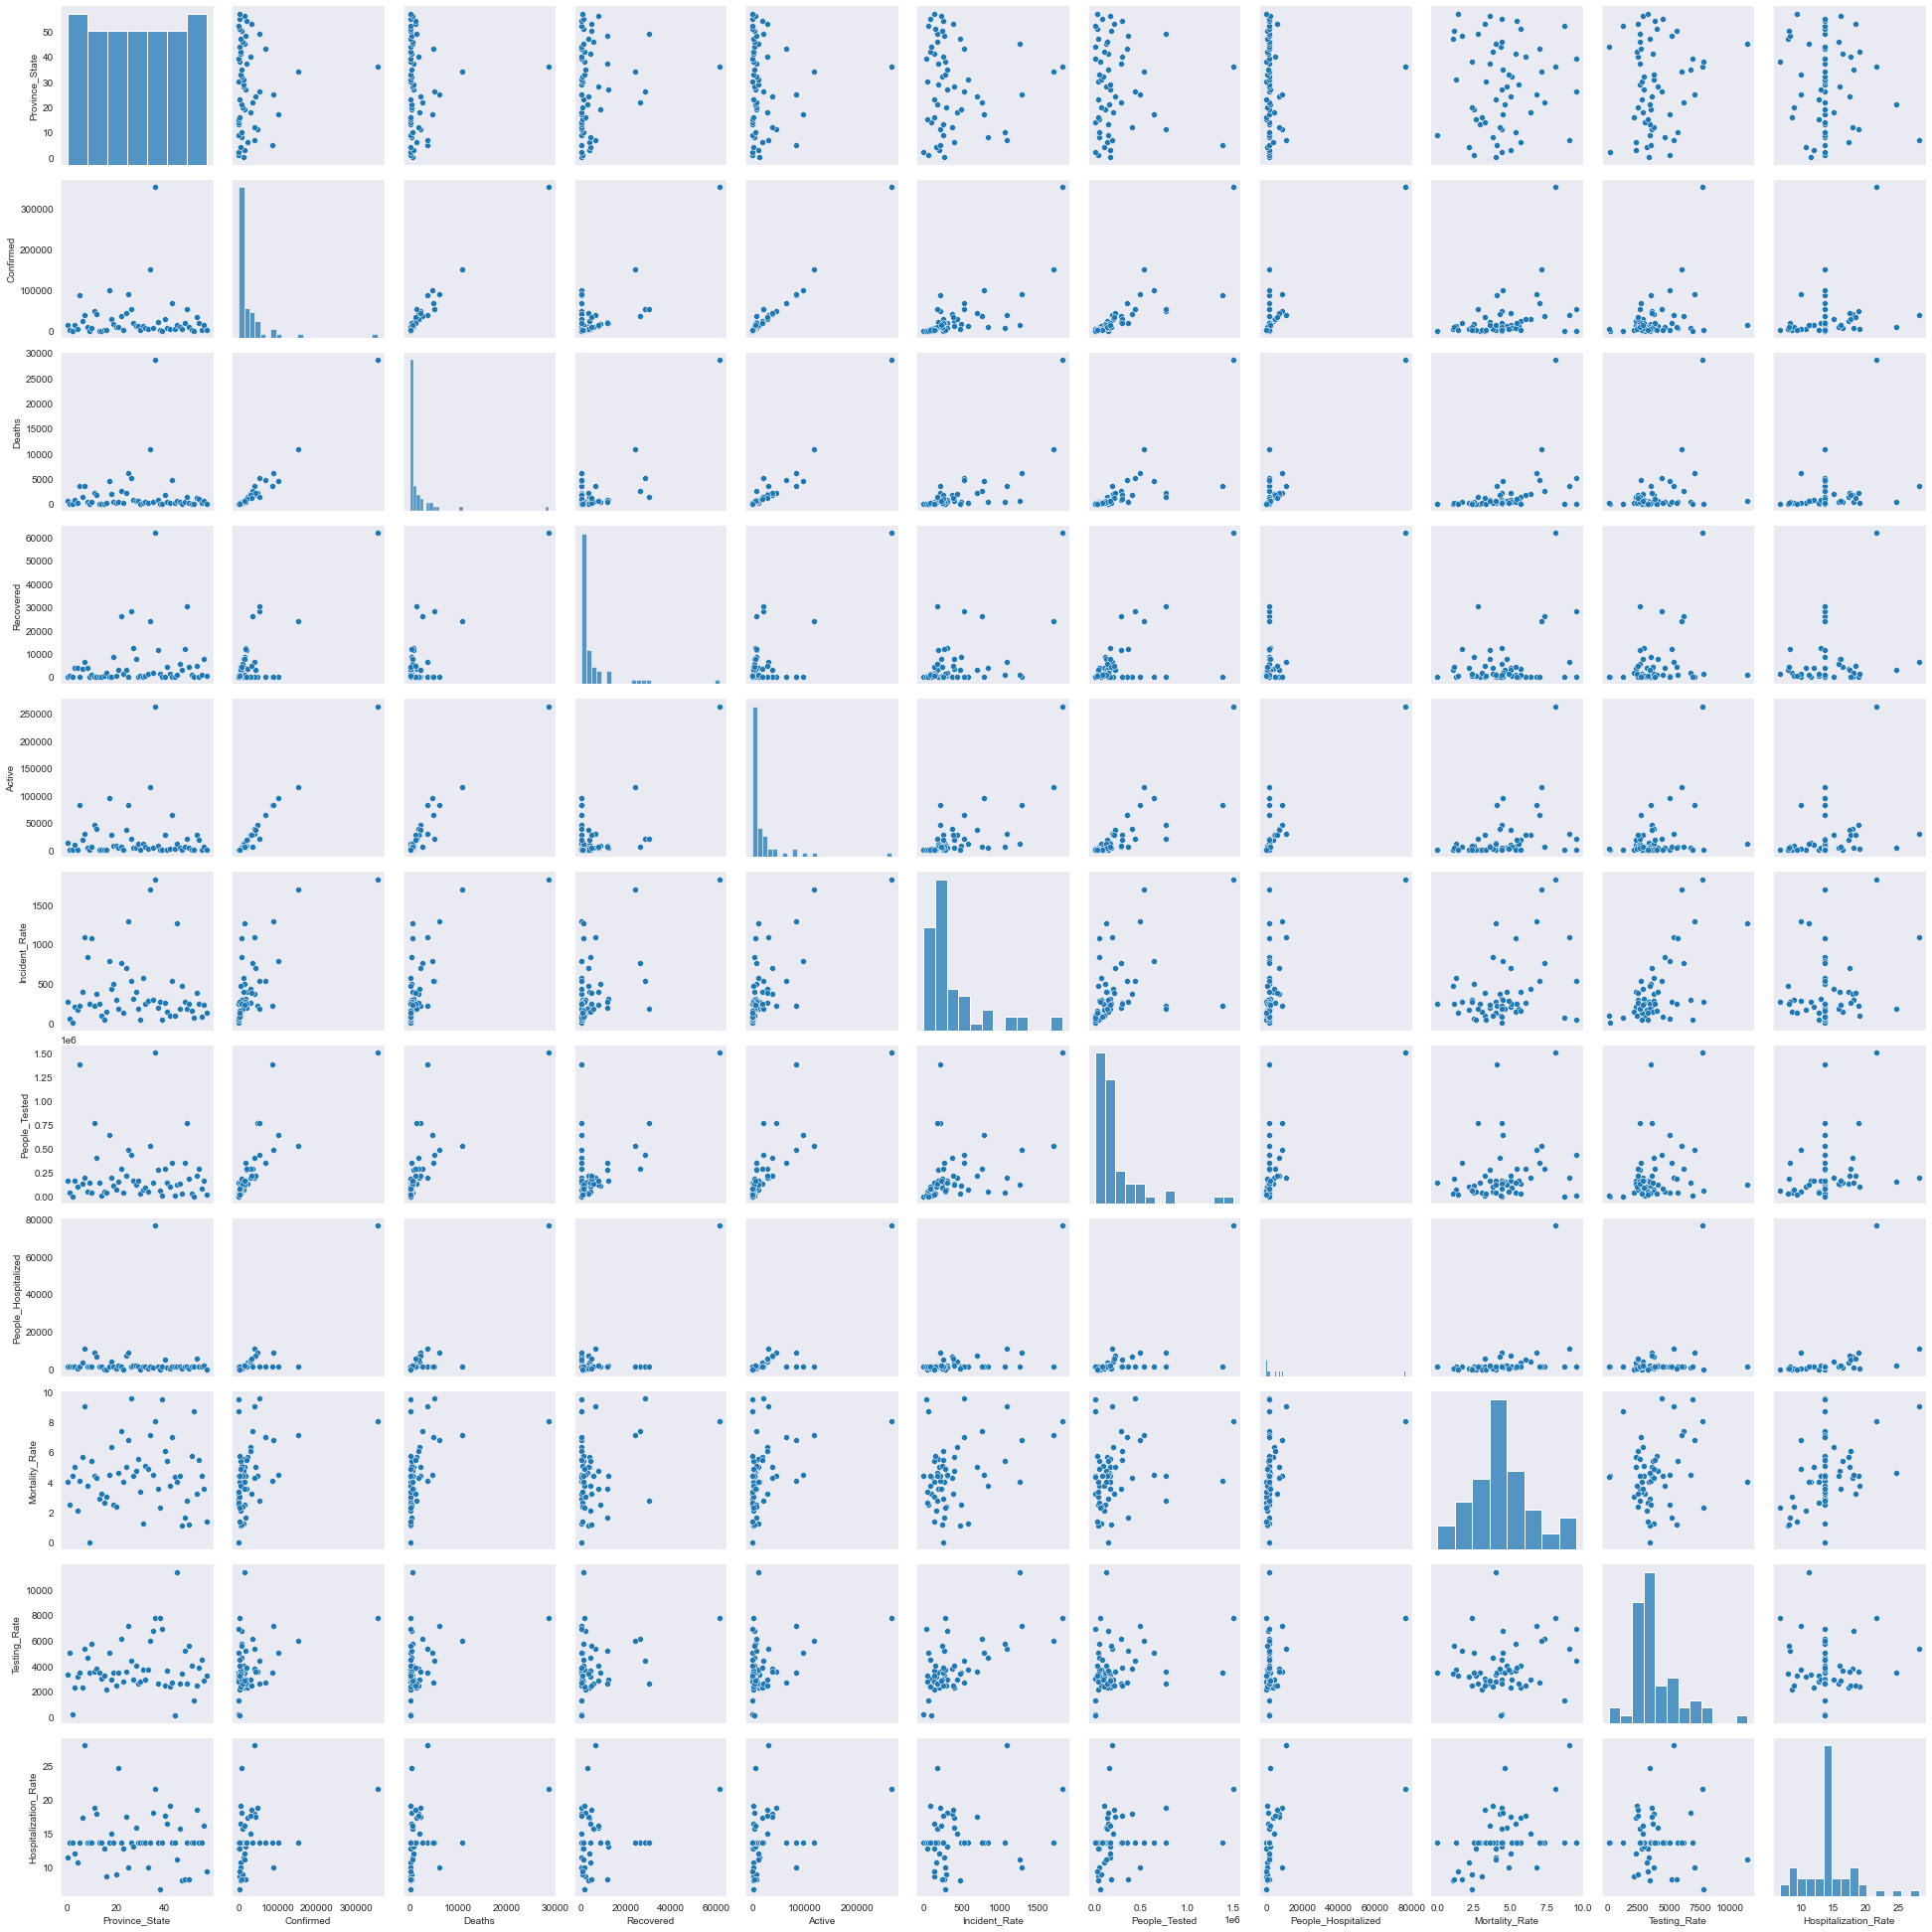

In [85]:
#checking the pairplot and analysisng corelation among high corelated columns columns
plt.figure(figsize=(30,30))
sns.pairplot(df,vars=["Province_State",'Confirmed','Deaths','Recovered','Active','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate'])

In [86]:
#most of the columns are linearly corelated to deaths and recovery of the cases

In [87]:
#cheking the co relations
df.corr()

,Province_State,Lat,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Province_State,1.000000,0.146287,0.006490,0.015229,0.136544,-0.027612,-0.064733,-0.054543,0.011204,0.019805,-0.031331,0.091233,-0.127705
Lat,0.146287,1.000000,0.116606,0.116727,0.082862,0.116021,0.242365,0.082494,0.062795,-0.142962,0.774449,0.307521,-0.044700
Confirmed,0.006490,0.116606,1.000000,0.982191,0.756823,0.985218,0.713360,0.828190,0.858569,0.382766,0.153972,0.336160,0.287188
Deaths,0.015229,0.116727,0.982191,1.000000,0.782292,0.954378,0.713560,0.742632,0.899983,0.427304,0.120043,0.347261,0.299603
Recovered,0.136544,0.082862,0.756823,0.782292,1.000000,0.634259,0.523887,0.598979,0.701931,0.306310,0.150011,0.272625,0.201832
Active,-0.027612,0.116021,0.985218,0.954378,0.634259,1.000000,0.705566,0.829952,0.827144,0.367845,0.146354,0.324917,0.285115
Incident_Rate,-0.064733,0.242365,0.713360,0.713560,0.523887,0.705566,1.000000,0.443694,0.543825,0.371817,0.259727,0.621457,0.195784
People_Tested,-0.054543,0.082494,0.828190,0.742632,0.598979,0.829952,0.443694,1.000000,0.624709,0.234981,0.232074,0.232459,0.246981
People_Hospitalized,0.011204,0.062795,0.858569,0.899983,0.701931,0.827144,0.543825,0.624709,1.000000,0.303147,0.059836,0.280916,0.386925
Mortality_Rate,0.019805,-0.142962,0.382766,0.427304,0.306310,0.367845,0.371817,0.234981,0.303147,1.000000,-0.232810,0.170826,0.433861


Province_State              AxesSubplot(0.125,0.71587;0.168478x0.16413)
Lat                      AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Confirmed                AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Deaths                   AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Recovered                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
Active                  AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Incident_Rate           AxesSubplot(0.529348,0.518913;0.168478x0.16413)
People_Tested           AxesSubplot(0.731522,0.518913;0.168478x0.16413)
People_Hospitalized        AxesSubplot(0.125,0.321957;0.168478x0.16413)
Mortality_Rate          AxesSubplot(0.327174,0.321957;0.168478x0.16413)
UID                     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Testing_Rate            AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Hospitalization_Rate          AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

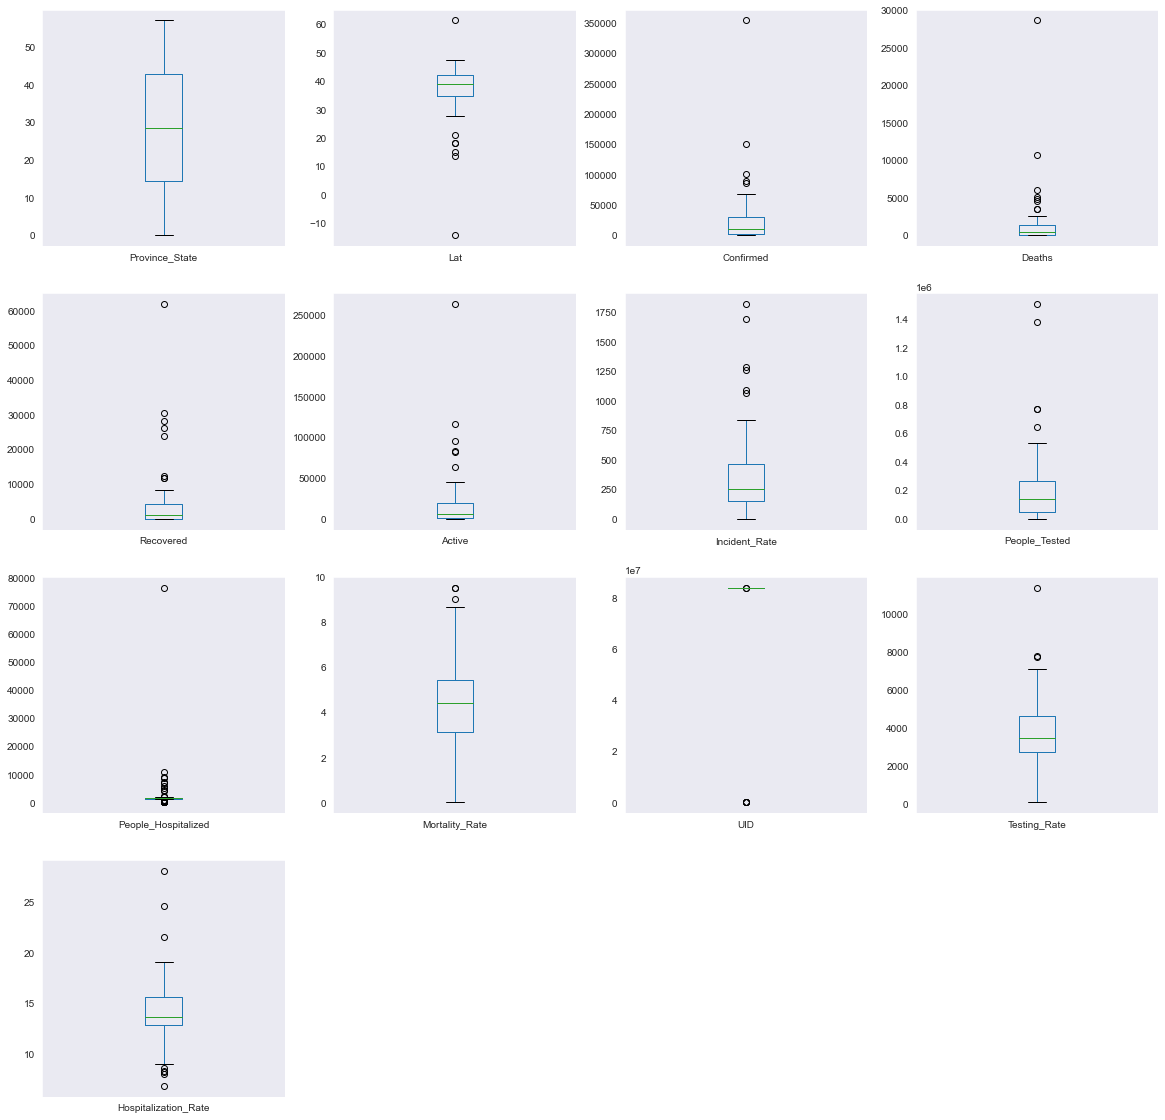

In [88]:
#All have verry good co relation lets check outliers
#Cheking the outliers
df.plot(kind="box", subplots=True, layout=(4,4),figsize=(20,20))

In [89]:
#except provice state all other columns have outliers we need to remove that

Index(['Province_State', 'Lat', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'UID', 'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')
0.0


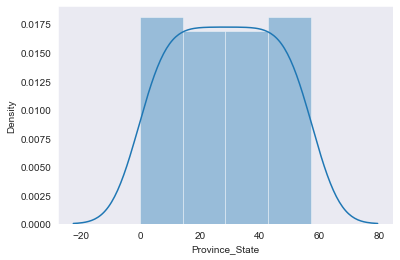

-2.2670893811609174


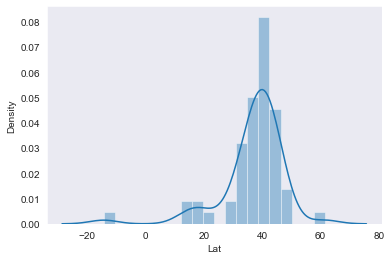

4.70861433293441


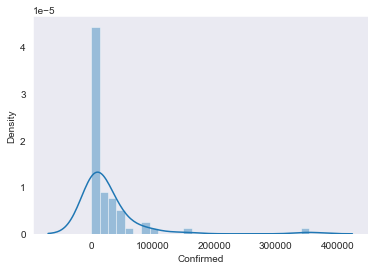

5.489200772351298


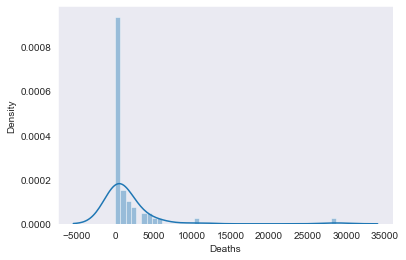

3.6495559285743795


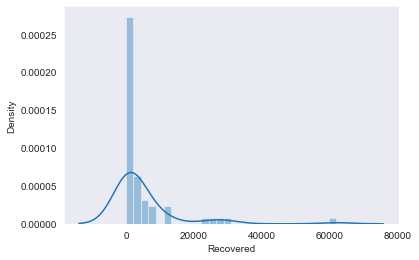

4.180952955790349


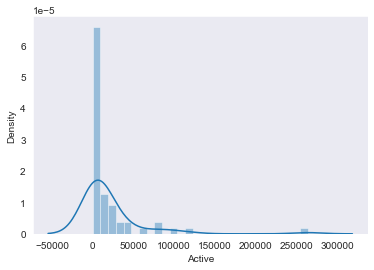

2.0122958465008156


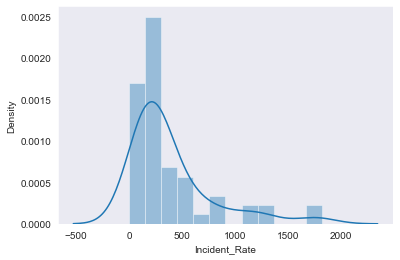

2.847891931567768


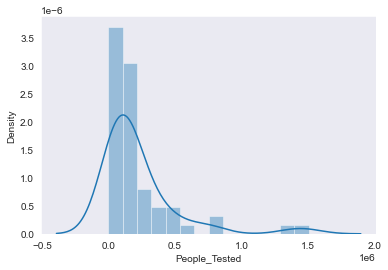

7.015365921988985


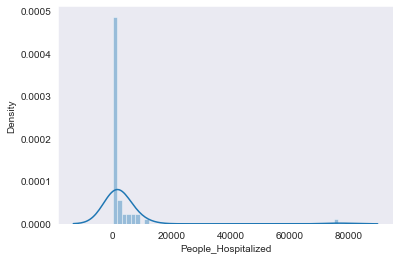

0.4974966101480089


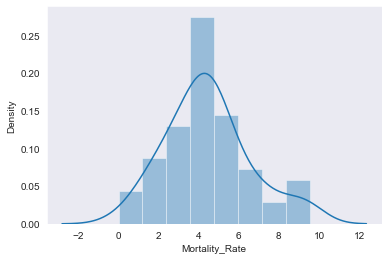

-3.027479962164918


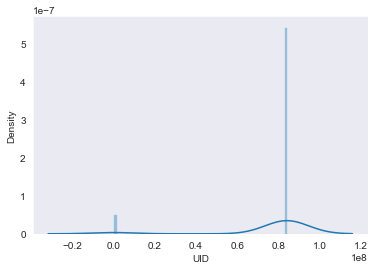

1.3336013289773858


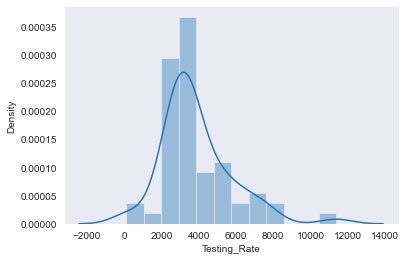

1.114427877487214


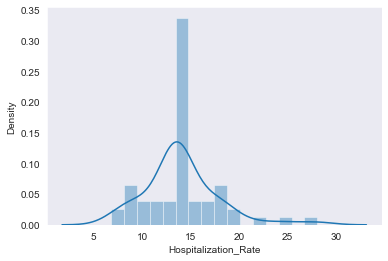

In [90]:
#Cheking skewness
print(df.columns)
for i in df.columns:
    sns.distplot(df[i])
    print(df[i].skew())
    plt.show()

In [92]:
#some of the columns have high skewness so we need to remove them

# Data cleaning and Transformation

In [94]:
#removing the outliers
print(df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df))
z

(58, 13)


array([[1.70244092e+00, 4.33433118e-01, 2.62999251e-01, 2.68934023e-01,
        4.92504699e-01, 1.84202386e-01, 3.18067873e-01, 2.00407990e-01,
        1.94908389e-01, 2.18274475e-01, 3.06995177e-01, 2.78971037e-01,
        6.85630454e-01],
       [1.64270615e+00, 2.30491872e+00, 5.05788407e-01, 3.95372994e-01,
        4.58340357e-01, 4.89328519e-01, 8.55885203e-01, 6.37642368e-01,
        1.94908389e-01, 9.35961285e-01, 3.06995220e-01, 6.28621946e-01,
        1.12400194e-01],
       [1.58297138e+00, 4.82471172e+00, 5.13484119e-01, 3.97842505e-01,
        4.92504699e-01, 4.90281199e-01, 9.95353865e-01, 7.64349566e-01,
        1.94908389e-01, 2.57319108e-02, 3.25578286e+00, 1.94081597e+00,
        1.12400194e-01],
       [1.52323661e+00, 3.00382349e-01, 2.27418578e-01, 2.13370022e-01,
        1.26305654e-01, 2.36575329e-01, 4.74303637e-01, 1.97027622e-01,
        1.64822127e-01, 2.64125511e-01, 3.06995304e-01, 8.52763280e-01,
        5.30834743e-01],
       [1.46350184e+00, 1.83515214e-

In [96]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
percentage_ofouliers=((58-48)/58)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(48, 13)
using z score percentage of outlier removed: 17.24137931034483


In [97]:
#Cheking the skewness again
df_new.skew()

Province_State          0.076256
Lat                     0.288046
Confirmed               1.951730
Deaths                  2.235443
Recovered               2.646826
Active                  2.486791
Incident_Rate           1.770937
People_Tested           1.833395
People_Hospitalized     1.993173
Mortality_Rate          0.266314
UID                     4.764465
Testing_Rate            1.330841
Hospitalization_Rate    0.407974
dtype: float64

In [98]:
#This x1 and y1 is for prediction of deaths
x1=df_new.drop(labels="Deaths",axis=1)
y1=df_new["Deaths"]
#This x1 and y1 is for prediction of deaths
x2=df_new.drop(labels="Recovered",axis=1)
y2=df_new["Recovered"]

In [99]:
#lest remove the skewness and standardize the values

from sklearn.preprocessing import power_transform
x1=power_transform(x1,method=("yeo-johnson"))
x2=power_transform(x2,method=("yeo-johnson"))
x1=pd.DataFrame(x1)
x2=pd.DataFrame(x2)
print(x1.skew(),"\n",x2.skew())

0    -0.231425
1     0.113288
2    -0.073848
3    -0.286995
4    -0.086949
5     0.001124
6    -0.007542
7     0.008207
8     0.000340
9     0.000000
10    0.087819
11    0.011336
dtype: float64 
 0    -0.231425
1     0.113288
2    -0.073848
3    -0.051912
4    -0.086949
5     0.001124
6    -0.007542
7     0.008207
8     0.000340
9     0.000000
10    0.087819
11    0.011336
dtype: float64


In [100]:
#standardizing the values
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
print(sl.fit(x1))
print(sl.fit(x2))

StandardScaler()
StandardScaler()


# Model Fitting

In [101]:
#Number of death prediction

In [102]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score
#evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [120]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=x)
        md=model()
        md.fit(x1_train,y1_train)
        predict=md.predict(x1_test)
        r2score=r2_score(y1_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [104]:
model_select(LinearRegression)

Max score is 0.8235320447064339 with random state 60


In [105]:
model_select(KNeighborsRegressor)

Max score is 0.8833019651984965 with random state 51


In [106]:
model_select(DecisionTreeRegressor)

Max score is 0.9424859320953727 with random state 54


In [107]:
model_select(SVR)

Max score is 0 with random state 0


In [108]:
model_select(Ridge)

Max score is 0.8376606082837021 with random state 60


In [109]:
model_select(RandomForestRegressor)

Max score is 0.9539260866969216 with random state 98


In [110]:
#from above model performance we can see that RandomForestRegressor gives best accuracy with random state 98 so lets proceed with that model

In [112]:
#Training the data set with best random state
x1_train,x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=98)
print(x1_train.shape, x1_test.shape)

(32, 12) (16, 12)


In [113]:
#cheking CV score
cross_val_score(RandomForestRegressor(),x1_train,y1_train,cv=5).mean()

0.7247568450397575

In [126]:
#optimization
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [129]:
#Hyperparameter tuning
rf= RandomForestRegressor()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["mse", "mae"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf, parameters, scoring = make_scorer(r2_score))
grid_cv = grid_cv.fit(x1_train,y1_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=7)

In [ ]:
#Now we ahve got the best estimated state lets train the model

In [130]:
rg=grid_cv.best_estimator_
rg.fit(x1_train,y1_train)
print(rg.score(x1_train, y1_train))

0.9902104787810689


In [132]:
predict=rg.predict(x1_test)

pd.Series(predict)

0      526.142857
1      432.714286
2      607.000000
3      308.571429
4     3546.857143
5      263.714286
6     2488.428571
7     2098.428571
8      311.000000
9      502.571429
10    1320.000000
11      98.428571
12     187.142857
13    2383.857143
14    1479.714286
15     356.000000
dtype: float64

In [135]:
print("R2 score is "+str(r2_score(y1_test,predict)))
print("Mean absolute error is "+str(mean_absolute_error(y1_test,predict)))
print("Mean squared error is "+str(mean_squared_error(y1_test,predict)))

R2 score is 0.821534206458178
Mean absolute error is 386.32142857142856
Mean squared error is 277395.72959183675


In [136]:
y1_test

56     481
20     202
29     640
46     407
43    4770
16      77
49    1426
22    2608
28     570
31     138
18    1864
23      73
33     190
12    1697
24    2123
50      90
Name: Deaths, dtype: int64

Text(0, 0.5, 'Predicted Y')

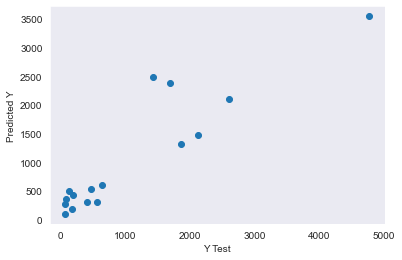

In [137]:
# Plotting the actual y and predicted y
plt.scatter(x=y1_test,y=predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [139]:
#lets save this model since we have satisfied with the accuracy
#Random forest performs best
#now we can the predict the number of deaths on the atributes values
import pickle

In [192]:
filename="Covid_US_Deaths.pkl"
pickle.dump(rg,open(filename,"wb"))

#Lets predict the number of recoveries

In [141]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.33, random_state=x)
        md=model()
        md.fit(x2_train,y2_train)
        predict=md.predict(x2_test)
        r2score=r2_score(y2_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [170]:
model_select(LinearRegression)

Max score is 0.6759780544328162 with random state 56


In [171]:
model_select(KNeighborsRegressor)

Max score is 0.2860137713072961 with random state 95


In [208]:
model_select(DecisionTreeRegressor)

Max score is 0.6279164959642416 with random state 71


In [179]:
model_select(AdaBoostRegressor)

Max score is 0.5647743364229589 with random state 74


In [174]:
model_select(SVR)

Max score is 0 with random state 0


In [178]:
model_select(RandomForestRegressor)

Max score is 0.393321253677686 with random state 66


In [167]:
model_select(Ridge)

Max score is 0.7099116742999279 with random state 51


In [168]:
model_select(Lasso)

Max score is 0.6737739677076626 with random state 56


In [149]:
#From the above we can see LinearRegression performs best.

In [219]:
#Lets train with the best random state
x2_train,x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.33, random_state=57)
print(x2_train.shape, x2_test.shape)

(32, 12) (16, 12)


In [220]:
cross_val_score(DecisionTreeRegressor(),x2_train,y2_train,cv=5).mean()

-1.5484734607456645

In [221]:
dt=DecisionTreeRegressor()
parameters = {
              "criterion": ["mse", "friedman_mse", "mae", "poisson"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(dt, parameters, scoring = make_scorer(r2_score))
grid_cv = grid_cv.fit(x2_train,y2_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


DecisionTreeRegressor(max_depth=3, max_features='log2')

In [206]:
#now we ahve got the best estimated model

In [230]:
dt=grid_cv.best_estimator_
dt.fit(x2_train,y2_train)
print(dt.score(x2_train, y2_train))

0.9220893247255901


In [231]:
predict=dt.predict(x2_test)

pd.Series(predict)

0      2355.928571
1      2355.928571
2     30341.000000
3         0.000000
4      2355.928571
5     30341.000000
6      2355.928571
7         0.000000
8      2355.928571
9      2355.928571
10     6037.333333
11     6037.333333
12     2355.928571
13     6037.333333
14     6037.333333
15     2355.928571
dtype: float64

In [232]:

print("Mean absolute error is "+str(mean_absolute_error(y2_test,predict)))
print("Mean squared error is "+str(mean_squared_error(y2_test,predict)))

Mean absolute error is 6713.636904761905
Mean squared error is 117877499.2803288


In [233]:
y2_test

20      473.0
23     1100.0
53     4523.0
12        0.0
48    11783.0
43        0.0
37    11637.0
24     2993.0
13        0.0
38     1302.0
32      336.0
33     1275.0
30      440.0
10     1059.0
35     1882.0
4      3852.0
Name: Recovered, dtype: float64

Text(0, 0.5, 'Predicted Y')

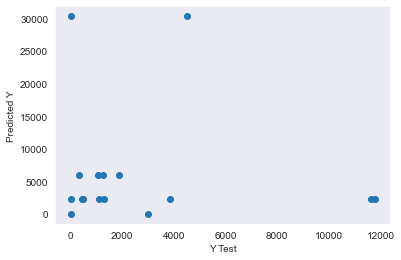

In [234]:
# Plotting the actual y and predicted y
plt.scatter(x=y2_test,y=predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [235]:
#Althogh we have got little less acuracy after tuning this is the best we got 
#now we can the predict recovered cases based on the atributes values
import pickle

In [236]:
filename="Covid_US_recovery.pkl"
pickle.dump(dt,open(filename,"wb"))